In [1]:
pip install Quandl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import quandl

In [3]:
QUANDL_KEY = 'VMuJREsX2yY4_McfSNj9'
quandl.ApiConfig.api_key = QUANDL_KEY

In [4]:
df_quandl = quandl.get(dataset='WIKI/AMZN',
                      start_date='2000-01-01',
                      end_date='2010-12-31')

In [5]:
print(f'Downloaded {df_quandl.shape[0]}rows of data.')

df_quandl.head()

Downloaded 2767rows of data.


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2000-01-03,81.50,89.56,80.00,89.38,16117600.0,0.0,1.0,81.50,89.56,80.00,89.38,16117600.0
2000-01-04,85.38,91.50,81.75,81.94,17487400.0,0.0,1.0,85.38,91.50,81.75,81.94,17487400.0
2000-01-05,70.75,75.13,69.63,71.75,38457400.0,0.0,1.0,70.75,75.13,69.63,71.75,38457400.0
2000-01-06,71.31,72.69,64.00,65.56,18752000.0,0.0,1.0,71.31,72.69,64.00,65.56,18752000.0
2000-01-07,67.00,70.50,66.19,69.56,10505400.0,0.0,1.0,67.00,70.50,66.19,69.56,10505400.0


In [6]:
import pandas as pd
import numpy as np
import yfinance as yf

In [7]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


Download the data and keep the adjusted close price only

In [8]:
df = yf.download('AMZN', 
                start='2000-01-01',
                end='2010-12-31')
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)

[*********************100%***********************]  1 of 1 completed


Convert adjusted close prices to simple and log returns

In [9]:
df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))

Inspect the output

In [10]:
df.head()

,adj_close,simple_rtn,log_rtn
Date,,,
1999-12-31,76.1250,NaN,NaN
2000-01-03,89.3750,0.174056,0.160464
2000-01-04,81.9375,-0.083217,-0.086884
2000-01-05,69.7500,-0.148741,-0.161039
2000-01-06,65.5625,-0.060036,-0.061914


In [11]:
df_all_dates = pd.DataFrame(index=pd.date_range(start='2000-01-01',
                                                end='2010-12-31'))
df = df_all_dates.join(df[['adj_close']], how='left') \
.fillna(method='ffill')\
.asfreq('M')

In [12]:
df_cpi = quandl.get(dataset = 'RATEINF/CPI_USA',
                   start_date='2000-01-01',
                   end_date='2010-12-31')
df_cpi.rename(columns={'Value':'cpi'}, inplace=True)

In [13]:
df_merged = df.join(df_cpi, how = 'left')

In [14]:
df_merged ['simple_rtn'] = df_merged.adj_close.pct_change()
df_merged['inflation_rate'] = df_merged.cpi.pct_change()

In [17]:
df_merged['real_rtn'] = (df_merged.simple_rtn + 1) / (df_merged.inflation_rate + 1) -1
df_merged.head()

,adj_close,cpi,simple_rtn,inflation_rate,real_rtn
2000-01-31,64.5625,168.8,NaN,NaN,NaN
2000-02-29,68.8750,169.8,0.066796,0.005924,0.060513
2000-03-31,67.0000,171.2,-0.027223,0.008245,-0.035178
2000-04-30,55.1875,171.3,-0.176306,0.000584,-0.176787
2000-05-31,48.3125,171.5,-0.124575,0.001168,-0.125596


Changing Frequency

In [8]:
import pandas as pd
import numpy as np
import yfinance as yf

#download data
df = yf.download('AMZN',
                start='2000-01-01',
                end='2010-12-31',
                auto_adjust=False,
                progress=False)

#keep only the adjusted close price
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close': 'adj_close'}, inplace =True)


#calculate log returns
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))


#remove redundant data
df.drop('adj_close', axis=1, inplace =True)
df.dropna(axis=0, inplace=True)

df.head()

,log_rtn
Date,
2000-01-03,0.160464
2000-01-04,-0.086884
2000-01-05,-0.161039
2000-01-06,-0.061914
2000-01-07,0.059222


1. Import the libraries

In [9]:
import pandas as pd

2. Define the function for calculating the realized volatility:

In [11]:
def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

3. Calculate monthly realized volatility:

In [12]:
df_rv = df.groupby(pd.Grouper(freq='M')).apply(realized_volatility)
df_rv.rename(columns={'log_rtn':'rv'}, inplace=True)

4. Annualize the values:

In [13]:
df_rv.rv = df_rv.rv * np.sqrt(12)

5. Plot the results

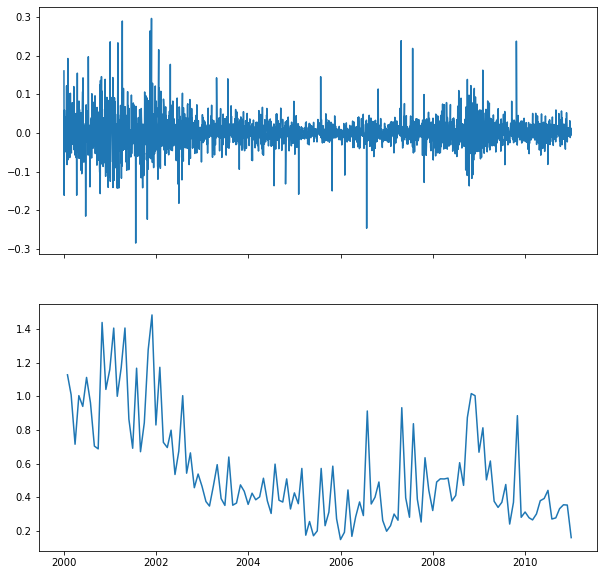

In [19]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots(2,1, sharex =True,figsize=(10,10))
ax[0].plot(df)
ax[1].plot(df_rv)

#plt.tight_layout()
plt.show()